Program to check out previous flights from the P3 to calculate various speeds..

In [1]:
%config InlineBackend.rc = {}
import matplotlib 
#matplotlib.rc_file('C:\\Users\\sleblan2\\Research\\python_codes\\file.rc')
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
#import Pysolar.solar as sol
import datetime
fp='C:/Users/sleblan2/Research/flight_planning/p3_flights/'

In [2]:
from path_utils import getpath

In [3]:
import load_utils as lm

In [4]:
from Sp_parameters import smooth

In [5]:
fp = getpath('ORACLES')
fp

Return path named:  ORACLES /data/sam/ORACLES/


'/data/sam/ORACLES/'

## P3 during ORACLES 2018

In [12]:
ora,orh = lm.load_ict(fp+'data_other_2018/Hskping_P3_20180927_R0.ict',return_header=True)

('Start_UTC', 'Day_Of_Year', 'Latitude', 'Longitude', 'GPS_Altitude', 'Pressure_Altitude', 'Radar_Altitude', 'Ground_Speed', 'True_Air_Speed', 'Indicated_Air_Speed', 'Mach_Number', 'Vertical_Speed', 'True_Heading', 'Track_Angle', 'Drift_Angle', 'Pitch_Angle', 'Roll_Angle', 'Static_Air_Temp', 'Potential_Temp', 'Dew_Point', 'Total_Air_Temp', 'IR_Surf_Temp', 'Static_Pressure', 'Cabin_Pressure', 'Wind_Speed', 'Wind_Direction', 'Solar_Zenith_Angle', 'Aircraft_Sun_Elevation', 'Sun_Azimuth', 'Aircraft_Sun_Azimuth', 'Mixing_Ratio', 'Part_Press_Water_Vapor', 'Sat_Vapor_Press_H2O', 'Sat_Vapor_Press_Ice', 'Relative_Humidity')


<IPython.core.display.Javascript object>


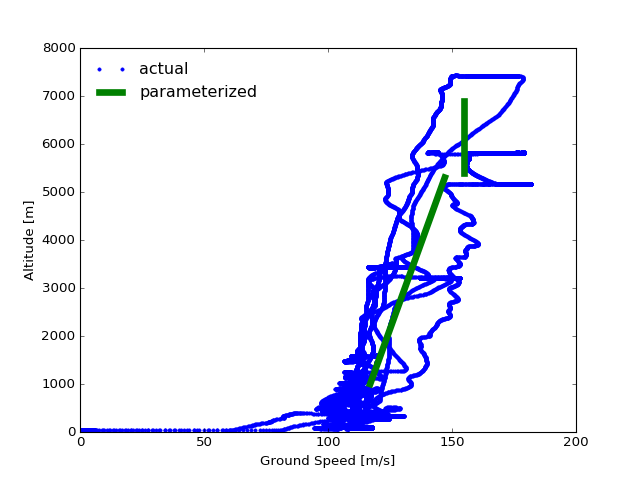

In [29]:
plt.figure()
plt.plot(ora['Ground_Speed'],ora['GPS_Altitude'],'.',label='actual')
alts = np.arange(1000,5400,100)
plt.plot(alts*0.007+110,alts,'g-',lw=6,label='parameterized')
plt.plot(np.arange(5400,7000,100)*0.0+155.0,np.arange(5400,7000,100),'g-',lw=6)
plt.legend(frameon=False,loc=2)
plt.ylabel('Altitude [m]')
plt.xlabel('Ground Speed [m/s]')

## P3 during ARCTAS

In [ ]:
arctas,header = lm.load_ict(fp+'pds_p3b_20080419_r2.ict',return_header=True)
header

In [41]:
vert_speed_ft = np.diff(arctas['GPS_ALT'])
arctas['GPS_ALT']

In [45]:
vert_speed = vert_speed_ft*0.3084

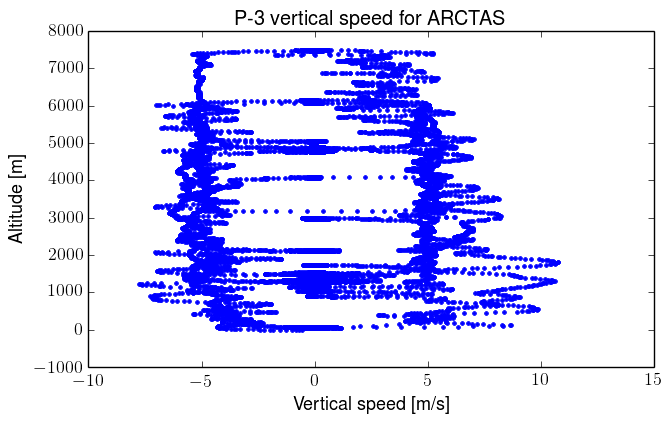

In [55]:
plt.plot(smooth(vert_speed,10),smooth(arctas['GPS_ALT'][1:]*0.3084,10),'b.')
plt.xlabel('Vertical speed [m/s]')
plt.ylabel('Altitude [m]')
plt.title('P-3 vertical speed for ARCTAS')

## P3 during DISCOVER-AQ Denver

In [58]:
discover = lm.load_ict(fp+'discoveraq-pds_p3b_20140807_r1.ict')

('UTC', 'FMS_ALT_PRES', 'FMS_TAS', 'FMS_SAT', 'FMS_LAT', 'FMS_LON', 'FMS_GRD_SPD', 'FMS_HDG', 'FMS_TRK', 'FMS_WNS', 'FMS_WND', 'IRS_PITCH', 'IRS_ROLL', 'IRS_VERT_ACC', 'ADC_IAS', 'GPS_ALT', 'A_DewPoint', 'A_CabinPressure', 'A_SurfTemp', 'A_TotalTemp', 'A_JNO2_Nadir', 'A_JNO2_Zenith', 'A_RadarAlt', 'C_StaticPressure', 'C_DiffPressure', 'C_StatTempDegC', 'C_PotTempDegK', 'C_MachNumber', 'C_CabAltitude', 'C_VaporPresWater', 'C_SatVaporPresWater', 'C_SatVaporPresIce', 'C_MixingRatio', 'C_RelHumidity')


In [59]:
d_vert_speed_ft = np.diff(discover['GPS_ALT'])

In [60]:
d_vert_speed = d_vert_speed_ft*0.3084

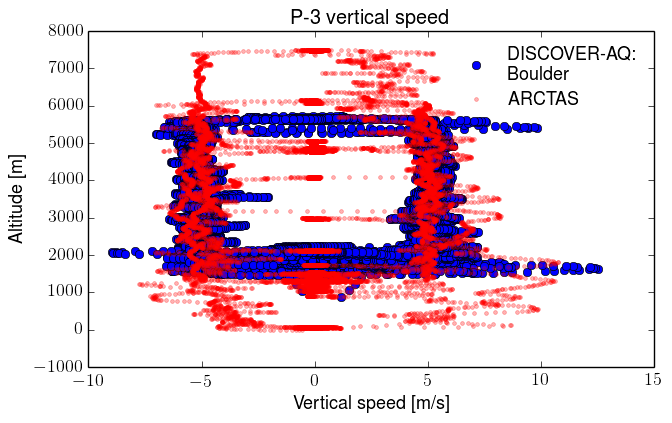

In [68]:
plt.plot(smooth(d_vert_speed,10),smooth(discover['GPS_ALT'][1:]*0.3084,10),'bo',label='DISCOVER-AQ:\n Boulder')
plt.plot(smooth(vert_speed,10),smooth(arctas['GPS_ALT'][1:]*0.3084,10),'r.',alpha=0.3,label='ARCTAS')
plt.xlabel('Vertical speed [m/s]')
plt.ylabel('Altitude [m]')
plt.title('P-3 vertical speed')
plt.legend(frameon=False,numpoints=1)
plt.savefig(fp+'P3_vert_speed.png',dpi=600,transparent=True)

In [109]:
vs_up = smooth(vert_speed[(vert_speed>1)&(arctas['GPS_ALT'][1:]*0.3084>6000)],10)

In [110]:
alt_up = smooth(arctas['GPS_ALT'][1:][(vert_speed>1)&(arctas['GPS_ALT'][1:]*0.3084>6000)],10)

In [112]:
v,xx = linfit.linfit(alt_up,vs_up)

In [114]:
p3_slope,p3_interp = v

In [115]:
p3_slope

-7.1240399084697678e-05

In [118]:
alt1

6500.0

In [123]:
alt0 = 5000.0

In [124]:
speed = 5.0

In [125]:
climb_time = (alt1-alt0)/speed

In [126]:
climb_time

300.0

## For ER2 during SEAC4RS

In [4]:
er2,header = lm.load_ict(fp+'seac4rs-nasdat_er2_20130821_r0.ict',return_header=True)

('Start_UTC', 'Latitude', 'Longitude', 'GPS_Altitude', 'Pressure_Altitude', 'Ground_Speed', 'True_Air_Speed', 'Mach_Number', 'True_Heading', 'Track_Angle', 'Drift_Angle', 'Pitch_Angle', 'Roll_Angle', 'Static_Air_Temp', 'Total_Air_Temp', 'E_Bay_Pressure', 'Wind_Speed', 'Wind_Direction', 'Solar_Zenith_Angle', 'Aircraft_Sun_Elevation', 'Sun_Azimuth', 'Aircraft_Sun_Azimuth')


In [5]:
er2_2 = lm.load_ict(fp+'seac4rs-nasdat_er2_20130922_r0.ict',return_header=False)

('Start_UTC', 'Latitude', 'Longitude', 'GPS_Altitude', 'Pressure_Altitude', 'Ground_Speed', 'True_Air_Speed', 'Mach_Number', 'True_Heading', 'Track_Angle', 'Drift_Angle', 'Pitch_Angle', 'Roll_Angle', 'Static_Air_Temp', 'Total_Air_Temp', 'E_Bay_Pressure', 'Wind_Speed', 'Wind_Direction', 'Solar_Zenith_Angle', 'Aircraft_Sun_Elevation', 'Sun_Azimuth', 'Aircraft_Sun_Azimuth')


In [6]:
header

['54,1001\n',
 'Project Office\n',
 'UARC/NSERC\n',
 'ER-2 (809) NASDAT\n',
 'SEAC4RS 2013 - Studies of Emissions and Atmospheric Composition, Clouds, and Climate Coupling by Regional Surveys\n',
 '1,1\n',
 '2013,08,21,2014,04,01\n',
 '1\n',
 'Start_UTC,seconds\n',
 '21\n',
 '1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1\n',
 '-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999\n',
 'Latitude, deg\n',
 'Longitude, deg\n',
 'GPS_Altitude, m\n',
 'Pressure_Altitude, ft\n',
 'Ground_Speed, m/s\n',
 'True_Air_Speed, m/s\n',
 'Mach_Number, mach\n',
 'True_Heading, deg (0-360)\n',
 'Track_Angle, deg (0-360)\n',
 'Drift_Angle, deg\n',
 'Pitch_Angle, deg (+-180)\n',
 'Roll_Angle, deg (+-180)\n',
 'Static_Air_Temp, Celsius\n',
 'Total_Air_Temp, Celsius\n',
 'E_Bay_Pressure, mb\n',
 'Wind_Speed, m/s\n',
 'Wind_Direction, deg (0-360)\n',
 'Solar_Zenith_Angle, deg\n',
 'Aircraft_Sun_Elevation, deg\n',
 'Sun_Azimuth, deg\n',
 'Ai

In [7]:
er2_vs = np.diff(er2['GPS_Altitude'])

In [8]:
er22_vs = np.diff(er2_2['GPS_Altitude'])

In [9]:
import plotting_utils as pu

<IPython.core.display.Javascript object>


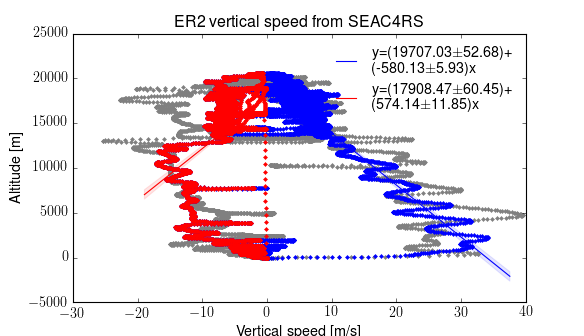

In [10]:
plt.plot(smooth(er22_vs,20),smooth(er2_2['GPS_Altitude'][1:],20),'.',color='grey')
plt.plot(smooth(er2_vs,20),smooth(er2['GPS_Altitude'][1:],20),'b.')
plt.plot(smooth(er2_vs[er2_vs<0],20),smooth(er2['GPS_Altitude'][1:][er2_vs<0],20),'r.')
pu.plot_lin(smooth(er2_vs[er2_vs>2],20),smooth(er2['GPS_Altitude'][1:][er2_vs>2],20))
pu.plot_lin(smooth(er2_vs[er2_vs<0],20),smooth(er2['GPS_Altitude'][1:][er2_vs<0],20),color='r')
plt.xlabel('Vertical speed [m/s]')
plt.ylabel('Altitude [m]')
plt.title('ER2 vertical speed from SEAC4RS')
plt.legend(frameon=False)
plt.savefig(fp+'ER2_vert_speed.png',dpi=600,transparent=True)

Get the inverse relationship for alt to vert speed

In [11]:
import linfit
v = linfit.linfit(smooth(er2['GPS_Altitude'][1:][er2_vs>2],20),smooth(er2_vs[er2_vs>2],20))

In [12]:
slope = v[0][0]
intercept = v[0][1]

In [13]:
slope,intercept

(-0.0010920765181533334, 24.061533363649215)

<IPython.core.display.Javascript object>


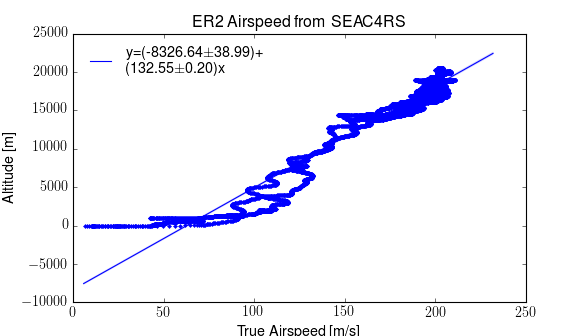

In [23]:
plt.figure()
plt.plot(smooth(er2['True_Air_Speed'],10),smooth(er2['GPS_Altitude'],10),'.',color='blue')
pu.plot_lin(smooth(er2['True_Air_Speed'],10),smooth(er2['GPS_Altitude'],10),color='blue')
plt.legend(frameon=False,loc=2)
plt.xlabel('True Airspeed [m/s]')
plt.ylabel('Altitude [m]')
plt.title('ER2 Airspeed from SEAC4RS')
plt.savefig(fp+'ER2_airspeed.png',dpi=600,transparent=True)

In [24]:
vy = linfit.linfit(smooth(er2['GPS_Altitude'],10),smooth(er2['True_Air_Speed'],10))

In [25]:
slopey,intercepty = vy[0]

In [26]:
slopey,intercepty

(0.0071031985846115213, 70.141068473788195)

## For DC8 during SEAC4RS

In [127]:
dc8,dc8header = lm.load_ict(fp+'nav_dc8_20080320_r1.ict',return_header=True)

('UTC', 'LAT', 'LON', 'GPS_ALT', 'PITCH', 'ROLL', 'WND_SPD', 'WND_DIR', 'T_AIR_SPD', 'GRD_SPD', 'HDG', 'DRIFT', 'P_ALT', 'C_RDR_ALT', 'DPT', 'SAT', 'TAT', 'IR_T_SURF', 'SAT_CALC', 'IND_AIR_SPD', 'VERT_AIR_SPD', 'CAB_ALT', 'P_STAT', 'MACH', 'TRK_ANGLE', 'MIX_RATIO', 'VAPOR_PRES', 'RH_ICE', 'RH_H2O', 'SAT_VP_H2O', 'SAT_VP_ICE', 'SUN_ELEV_EARTH', 'SUN_ELEV_PLANE', 'SUN_AZM_EARTH', 'SUN_AZM_PLANE', 'CAB_TEMP')


In [128]:
dc8header

['77  1001\n',
 'Project Office\n',
 'NSERC - National Suborbital Education and Research Center\n',
 'DC-8 Data Acquisition and Distribution -- REVEAL\n',
 'NASA ARCTAS MISSION 2008\n',
 '1  1\n',
 '2008  03  20  2009  02  27\n',
 '1.0\n',
 'Start_UTC time, seconds\n',
 '35\n',
 '1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 \n',
 '-99999 -99999 -99999 -99999 -99999 -99999 -99999 -99999 -99999 -99999 -99999 -99999 -99999 -99999 -99999 -99999 -99999 -99999 -99999 -99999 -99999 -99999 -99999 -99999 -99999 -99999 -99999 -99999 -99999 -99999 -99999 -99999 -99999 -99999 -99999\n',
 'Latitude, deg\n',
 'Longitude, deg\n',
 'GPS_Altitude, m \n',
 'Pitch, deg\n',
 'Roll, deg\n',
 'Wind_Speed, kts\n',
 'Wind_Dir, deg\n',
 'True_Air_Spd, kts\n',
 'Ground_Speed, kts\n',
 'True_Heading, deg\n',
 'Drift_Angle, deg\n',
 'Pressure_Alt, ft\n',
 'Radar_Altitude, ft\n',
 'DF_Point_2, C\n',
 'Static_Air_Temp, C\n',
 'Total_Air_Temp, C\n',
 'IR_Surf_temp, C\n',
 'Sat_Computed, C\n'

In [132]:
dc8_vs = np.diff(dc8['GPS_ALT'])

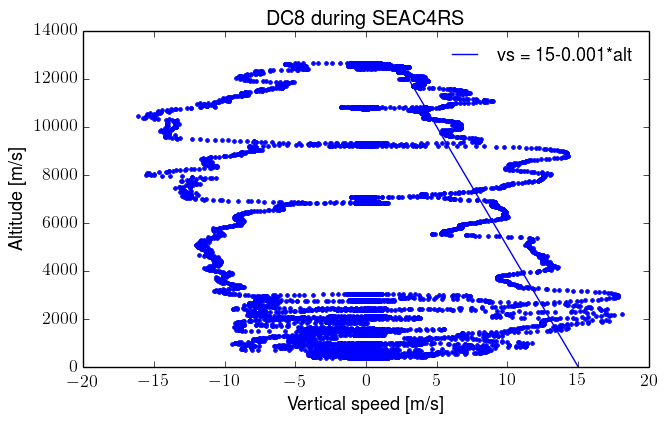

In [141]:
plt.plot(smooth(dc8_vs,10),smooth(dc8['GPS_ALT'][1:],10),'b.')
plt.plot(15.0-0.001*np.linspace(0,12000),np.linspace(0,12000),label='vs = 15-0.001*alt')
plt.title('DC8 during SEAC4RS')
plt.xlabel('Vertical speed [m/s]')
plt.ylabel('Altitude [m/s]')
plt.legend(frameon=False)
plt.savefig(fp+'DC8_vert_speed.png',dpi=600,transparent=True)

## C130 during ARISE

In [142]:
c130,c130header = lm.load_ict(fp+'arise-C130-Hskping_c130_20140911_RA_Preliminary.ict',return_header=True)

('Start_UTC', 'Day_Of_Year', 'Latitude', 'Longitude', 'GPS_Altitude', 'Pressure_Altitude', 'Ground_Speed', 'True_Air_Speed', 'Indicated_Air_Speed', 'Mach_Number', 'Vertical_Speed', 'True_Heading', 'Track_Angle', 'Drift_Angle', 'Pitch_Angle', 'Roll_Angle', 'Static_Air_Temp', 'Potential_Temp', 'Dew_Point_3Stage', 'Total_Air_Temp', 'IR_Surf_Temp', 'Static_Pressure', 'Cabin_Pressure', 'Wind_Speed', 'Wind_Direction', 'Solar_Zenith_Angle', 'Aircraft_Sun_Elevation', 'Sun_Azimuth', 'Aircraft_Sun_Azimuth', 'Mixing_Ratio', 'Part_Press_Water_Vapor', 'Sat_Vapor_Press_H2O', 'Sat_Vapor_Press_Ice', 'Relative_Humidity')


In [143]:
c130header

['66,1001\n',
 'Project Office\n',
 'NSERC - National Suborbital Education and Research Center\n',
 'C-130 (N439NA) Data Acquisition and Distribution\n',
 'ARISE 2014\n',
 '1,1\n',
 '2014,09,11,2014,11,22\n',
 '1\n',
 'Start_UTC,seconds\n',
 '33\n',
 '1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1\n',
 '-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999\n',
 'Day_Of_Year,\n',
 'Latitude, deg\n',
 'Longitude, deg            \n',
 'GPS_Altitude, m         \n',
 'Pressure_Altitude, ft      \n',
 'Ground_Speed, m/s           \n',
 'True_Air_Speed, kts       \n',
 'Indicated_Air_Speed, kts   \n',
 'Mach_Number, mach         \n',
 'Vertical_Speed, m/s       \n',
 'True_Heading, deg (0-360)         \n',
 'Track_Angle, deg (0-360)            \n',
 'Drift_Angle, deg            \n',
 'Pitch_Angle, deg (+-180)              \n',
 'Rol

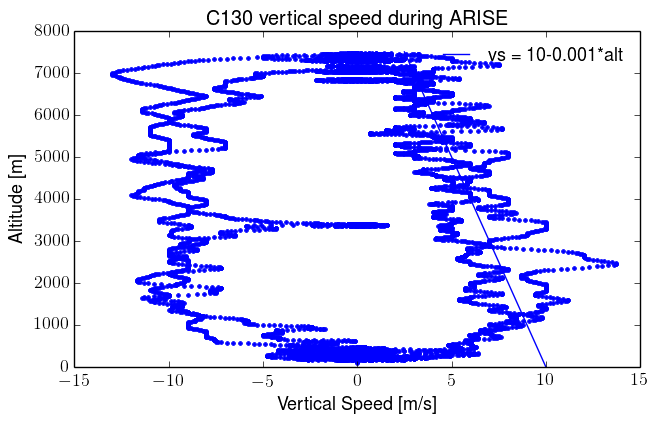

In [147]:
plt.plot(smooth(c130['Vertical_Speed'],10),smooth(c130['GPS_Altitude'],10),'b.')
plt.plot(10-0.001*np.linspace(0,7500),np.linspace(0,7500),label='vs = 10-0.001*alt')
plt.title('C130 vertical speed during ARISE')
plt.xlabel('Vertical Speed [m/s]')
plt.ylabel('Altitude [m]')
plt.legend(frameon=False)
plt.savefig(fp+'C130_vert_speed.png',dpi=600,transparent=True)

## Twin Otter during FASE

In [6]:
fp = getpath('PACE_PAX_DATA')

Return path named:  PACE_PAX_DATA /data2/PACEPAX/


In [7]:
import pandas as pd
import plotting_utils as pu

In [8]:
dat = pd.read_csv(fp+'twinotter/FASE/FASE_Cabin_V5.csv',header=0)

In [9]:
dat

,RF,UTC,Lat,Lon,Alt_CMIGITS_m,T,T_Dew,P_mb,WindHorSpeed,WindDir,WindVerSpeed,T_Skin,Alt_P_m,TAS,LWC,Na_CPC,Na_UFCPC
0,RF01,07/18/2016 20:39:26,36.678947,-121.756895,32.758896,292.223160,285.90214,NaN,4.310864,303.19,0.026631,312.801271,-21.086653,0.000000,NaN,10001.237,99900.0
1,RF01,07/18/2016 20:39:27,36.678933,-121.756857,32.927811,293.717606,285.92702,NaN,2.660746,293.58,-0.405995,308.810529,-20.932384,1.447055,NaN,10000.896,99900.0
2,RF01,07/18/2016 20:39:28,36.678928,-121.756818,33.024765,292.849252,285.94332,NaN,3.568352,267.95,0.046079,306.241529,-21.235945,0.160791,NaN,10002.607,99900.0
3,RF01,07/18/2016 20:39:29,36.678937,-121.756783,33.180222,292.425980,285.96852,NaN,3.322258,242.39,0.058737,309.339799,-21.007031,0.000000,NaN,10001.704,99900.0
4,RF01,07/18/2016 20:39:30,36.678952,-121.756762,32.989349,292.496220,286.00102,NaN,3.149340,214.37,0.055145,308.981805,-21.250872,0.000000,NaN,9999.348,99900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280405,RF16,08/12/2016 21:03:37,36.680015,-121.762027,34.398102,290.287767,285.86966,NaN,5.020135,286.33,-1.120016,307.682045,-7.307865,4.372929,0.002489,911.879,960.0
280406,RF16,08/12/2016 21:03:38,36.679977,-121.761949,34.501038,290.431383,285.80926,NaN,3.993805,287.61,-0.661262,309.477979,-7.098578,5.310149,0.002437,912.071,1050.0
280407,RF16,08/12/2016 21:03:39,36.679937,-121.761872,34.559525,290.561369,285.82782,NaN,3.960770,277.73,-0.079814,307.548422,-7.358523,5.784188,0.002548,916.669,980.0
280408,RF16,08/12/2016 21:03:40,36.679896,-121.761791,34.563232,290.083557,285.94730,NaN,6.165357,286.49,0.093305,305.851146,-7.089442,3.380030,0.002718,914.706,980.0


<IPython.core.display.Javascript object>


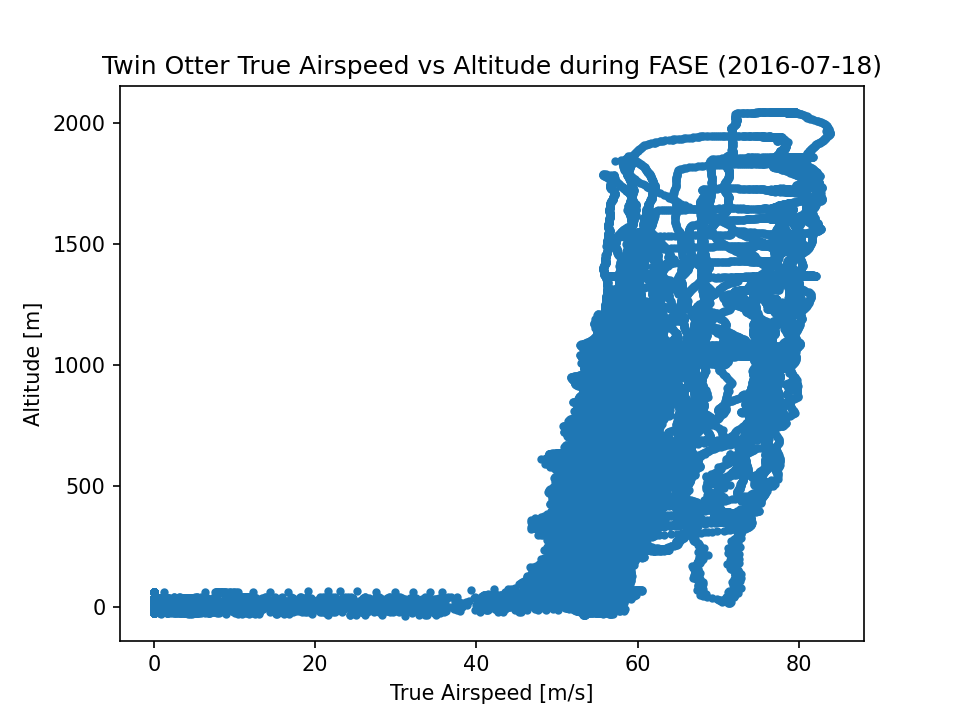

In [10]:
plt.figure()
plt.plot(dat['TAS'],dat['Alt_P_m'],'.')
plt.xlabel('True Airspeed [m/s]')
plt.ylabel('Altitude [m]')
plt.title('Twin Otter True Airspeed vs Altitude during FASE (2016-07-18)')
plt.savefig(fp+'twinotter/TO_TAS_FASE.png',dpi=600,transparent=True)

In [11]:
vert_speed = np.diff(smooth(dat['Alt_P_m'],20,old=True))
fl_up = (vert_speed>0.4) & (vert_speed<10) & (dat['Alt_P_m'][1:]>100.0) & (dat['TAS'][1:]>40.0)
fl_dn = (vert_speed<-0.4)& (vert_speed>-10)& (dat['Alt_P_m'][1:]>100.0) & (dat['TAS'][1:]>40.0)

<IPython.core.display.Javascript object>


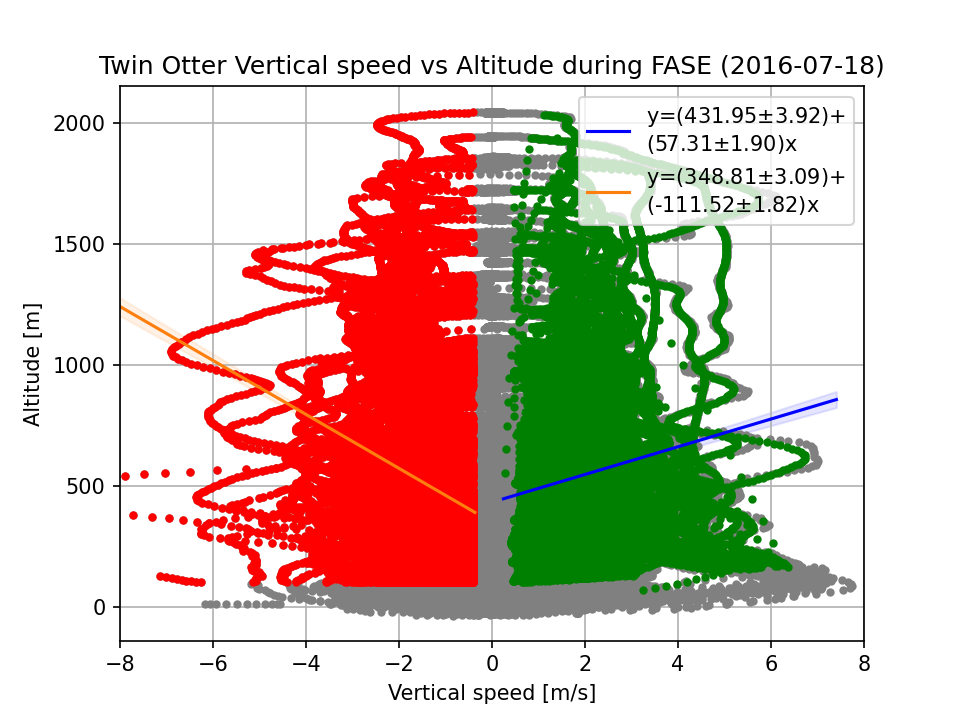

In [12]:
plt.figure()
plt.plot(vert_speed,dat['Alt_P_m'][1:],'.',color='grey')

plt.plot(smooth(vert_speed[fl_up],20,old=True),smooth(dat['Alt_P_m'][1:][fl_up],20,old=True),'.',color='g')
pu.plot_lin(smooth(vert_speed[fl_up],20,old=True),smooth(dat['Alt_P_m'][1:][fl_up],20,old=True),color='b')
plt.plot(vert_speed[fl_dn],dat['Alt_P_m'][1:][fl_dn],'.',color='r')
pu.plot_lin(smooth(vert_speed[fl_dn],20,old=True),smooth(dat['Alt_P_m'][1:][fl_dn],20,old=True),color='tab:orange')
plt.xlim(-8,8)
plt.grid()
plt.legend()

plt.xlabel('Vertical speed [m/s]')
plt.ylabel('Altitude [m]')
plt.title('Twin Otter Vertical speed vs Altitude during FASE (2016-07-18)')
plt.savefig(fp+'twinotter/TO_vertspeed_FASE.png',dpi=600,transparent=True)

<IPython.core.display.Javascript object>


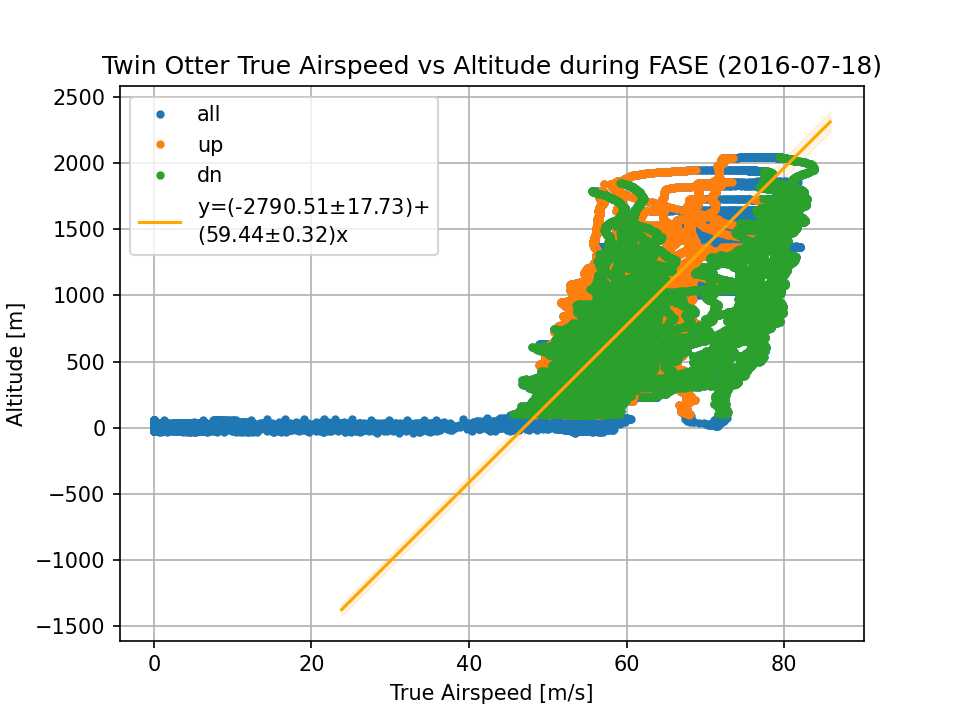

In [15]:
plt.figure()
plt.plot(dat['TAS'],dat['Alt_P_m'],'.',label='all')
plt.plot(dat['TAS'][1:][fl_up],dat['Alt_P_m'][1:][fl_up],'.',label='up')
plt.plot(dat['TAS'][1:][fl_dn],dat['Alt_P_m'][1:][fl_dn],'.',label='dn')
pu.plot_lin(smooth(dat['TAS'][1:][fl_up],20,old=True),smooth(dat['Alt_P_m'][1:][fl_up],20,old=True),color='orange')
plt.xlabel('True Airspeed [m/s]')
plt.ylabel('Altitude [m]')
plt.title('Twin Otter True Airspeed vs Altitude during FASE (2016-07-18)')
plt.grid()
plt.legend()
plt.savefig(fp+'twinotter/TO_TAS_FASE.png',dpi=600,transparent=True)